In [36]:
import numpy as np
from keras import layers, models, regularizers

import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def build_model(inputs, hiddens, outputs, kernel_reg=None, dropout=0):
    assert dropout >=0 and dropout < 1
    model = models.Sequential()
    model.add(layers.Dense(units=hiddens[0], activation='relu', 
                           input_shape=(inputs,), kernel_regularizer=kernel_reg))
    if dropout:
        model.add(layers.Dropout(rate=dropout))
    for n in hiddens[1:]:
        model.add(layers.Dense(units=n, activation='relu', kernel_regularizer=kernel_reg))
        if dropout:
            model.add(layers.Dropout(rate=dropout))
    model.add(layers.Dense(units=outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [5]:
from keras.datasets import imdb

In [6]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [7]:
def sequence2vec(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1.
    return results

In [12]:
x_train = sequence2vec(train_data, dimension=10000)
x_test = sequence2vec(test_data, dimension=10000)

x_train.shape, x_test.shape

((25000, 10000), (25000, 10000))

In [13]:
x_val, y_val = x_train[:10000], train_labels[:10000]
x_train, y_train = x_train[10000:], train_labels[10000:]

x_val.shape, y_val.shape, x_train.shape, y_train.shape

((10000, 10000), (10000,), (15000, 10000), (15000,))

In [25]:
nn1 = build_model(10000, [16, 16], 1)
nn2 = build_model(10000, [4, 4], 1)
nn3 = build_model(10000, [512, 512], 1)

In [40]:
def compare_models(inputs, outputs, hiddens1, hiddens2, reg1=None, reg2=None, drop1=0, drop2=0):
    
    model1 = build_model(inputs, hiddens1, outputs, kernel_reg=reg1, dropout=drop1)
    model2 = build_model(inputs, hiddens2, outputs, kernel_reg=reg2, dropout=drop2)
    
    hx1 = model1.fit(x_train, y_train, validation_data=(x_val, y_val), 
                     epochs=20, batch_size=512, verbose=0)
    hx2 = model2.fit(x_train, y_train, validation_data=(x_val, y_val), 
                     epochs=20, batch_size=512, verbose=0)
    
    val_acc_1, val_loss_1 = hx1.history['val_acc'], hx1.history['val_loss']
    val_acc_2, val_loss_2 = hx2.history['val_acc'], hx2.history['val_loss']
    
    xs = range(1, len(val_acc_1)+1)
    fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
    ax[0].plot(xs, val_acc_1, '+', label='model_1')
    ax[0].plot(xs, val_acc_2, 'x', label='model_2')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(loc='best')
    
    ax[1].plot(xs, val_loss_1, '+', label='model_1')
    ax[1].plot(xs, val_loss_2, 'x', label='model_2')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend(loc='best')
    
    fig.tight_layout()
    plt.show()

#### Reducing/Increasing the network's size

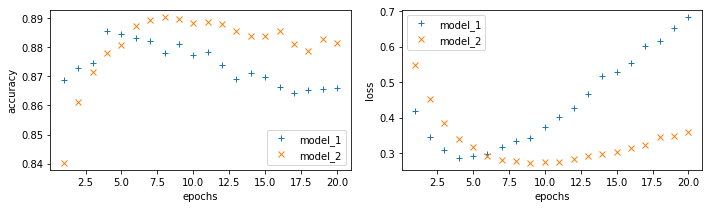

In [32]:
compare_models(10000, 1, hiddens1=[16, 16], hiddens2=[4, 4])

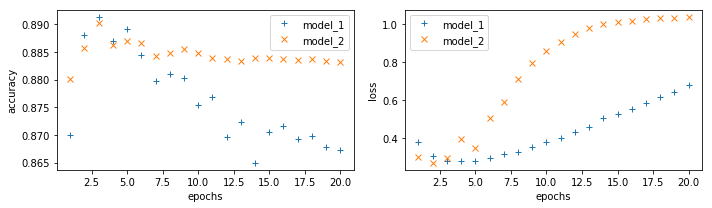

In [33]:
compare_models(10000, 1, hiddens1=[16, 16], hiddens2=[512, 512])

#### Adding weight regularization

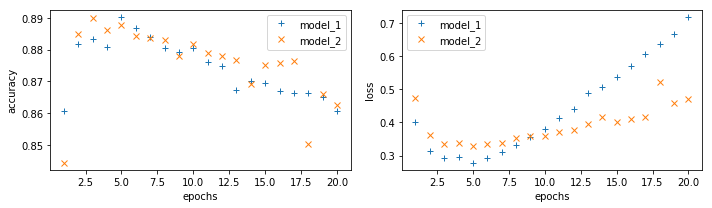

In [37]:
compare_models(10000, 1, hiddens1=[16, 16], hiddens2=[16, 16], 
               reg1=None, reg2=regularizers.l2(l=.001))

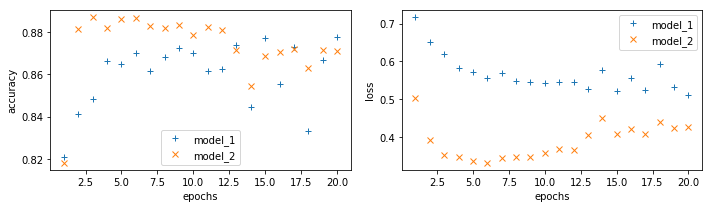

In [38]:
compare_models(10000, 1, hiddens1=[16, 16], hiddens2=[16, 16], 
               reg1=regularizers.l1(.001), reg2=regularizers.l2(l=.001))

#### adding dropout

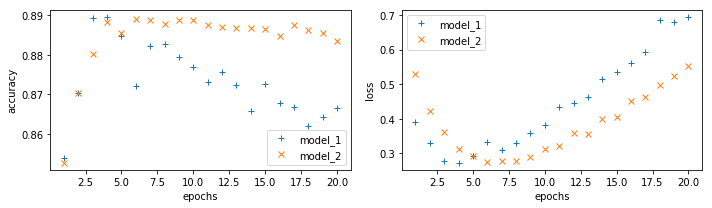

In [41]:
compare_models(10000, 1, hiddens1=[16, 16], 
               hiddens2=[16, 16], drop1=0, drop2=.5)

In [48]:
y_dummy = y_train.copy()
np.random.shuffle(y_dummy)

np.mean(y_dummy == y_train)

0.4962666666666667